Интерпретация прогнозов модели (SHAP): объясняем поведение модели на отдельных наблюдениях

- взять любой набор данных для бинарной классификации (можно скачать один из модельных с https://archive.ics.uci.edu/ml/datasets.php)
- сделать обзорный анализ выбранного датасета
- сделать feature engineering
- обучить любой классификатор (какой вам нравится)
- разобраться с SHAP и построить важности признаков для:
    - всего тестового набора данных (summary_plot - дать интерпретацию)
    - для топ 10%
- для отдельных наблюдений вывести force_plot и попытаться проинтерпретировать результат


Для примера возьмем пример из приведеущего задания https://archive.ics.uci.edu/ml/datasets/Wine+Quality, но приобразованый в бинароную выборку.

Входные переменные (на основе физико-химических тестов):
1 - фиксированная кислотность
2 - летучая кислотность
3 - лимонная кислота
4 - остаточный сахар
5 - хлориды
6 - свободный диоксид серы
7 - общий диоксид серы
8 - плотность
9 - pH
10 - сульфаты
11 - спирт
Выходная переменная (на основе сенсорных данных):
12 - качество (оценка от 0 до 10)

In [19]:
#!pip install shap

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import xgboost as xgb
import shap

In [2]:
data= pd.read_csv("winequality_all.csv", sep=';')
data.head(5)

,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,variety,quality
0,0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,0,1
1,1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,0,1
2,2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,0,1
3,3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0,1
4,4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0,1


In [3]:
data.drop('Unnamed: 0',axis=1, inplace=True)
data.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,variety,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,0,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,0,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,0,1


In [4]:
x_data = data.iloc[:,:-1]
y_data = data.iloc[:,-1]

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=7)

In [5]:
import xgboost as xgb

model = xgb.XGBClassifier()

model.fit(x_train, y_train)
y_predict = model.predict(x_test)

In [6]:
model = xgb.train({"learning_rate": 0.01}, 
                      xgb.DMatrix(x_train, label=y_train), 100)

# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn and spark models)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(x_train)

In [11]:
# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0,:], x_train.iloc[0,:])

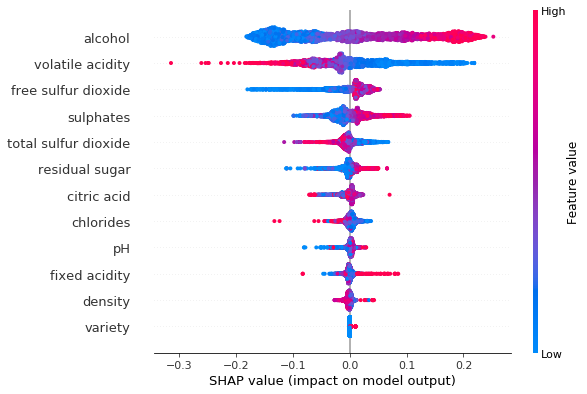

In [8]:
# summarize the effects of all the features
shap.summary_plot(shap_values, x_train)

Чем выше качество спирта, и деоксид серы, тем выше качесва вина. И обратно - тем меньше показатель volatile acidity, то так же вино с большей вероятностью относиться к хорошему качеству

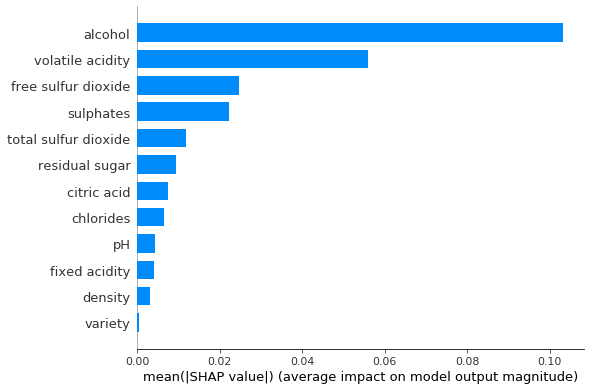

In [9]:
shap.summary_plot(shap_values, x_train, plot_type="bar")

In [ ]:
n = 50
shap.initjs() 
shap.force_plot(explainer.expected_value, shap_values[:n,:], x_train.iloc[:n,:])

In [14]:
len(shap_values)

5197